In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the iris dataset
from sklearn import datasets
iris = datasets.load_iris()


In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

so now we know the following about the data :


1.   "Iris-dataset" is a type of plant named iris.. there are 3 types of them
    *   Iris-Setosa 0
    *   Iris-Versicolour 1
    *   Iris-Virginica 2


2.   Number of Instances: 150 (50 in each of three classes)

  *   that means that the data is balanced..normally we shouldn't trust just the description but we will confirm this later

3.   there are 4 features that should help us identify to which class that each plant belongs to
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm


the importance of each feature will be realized after analyzation 

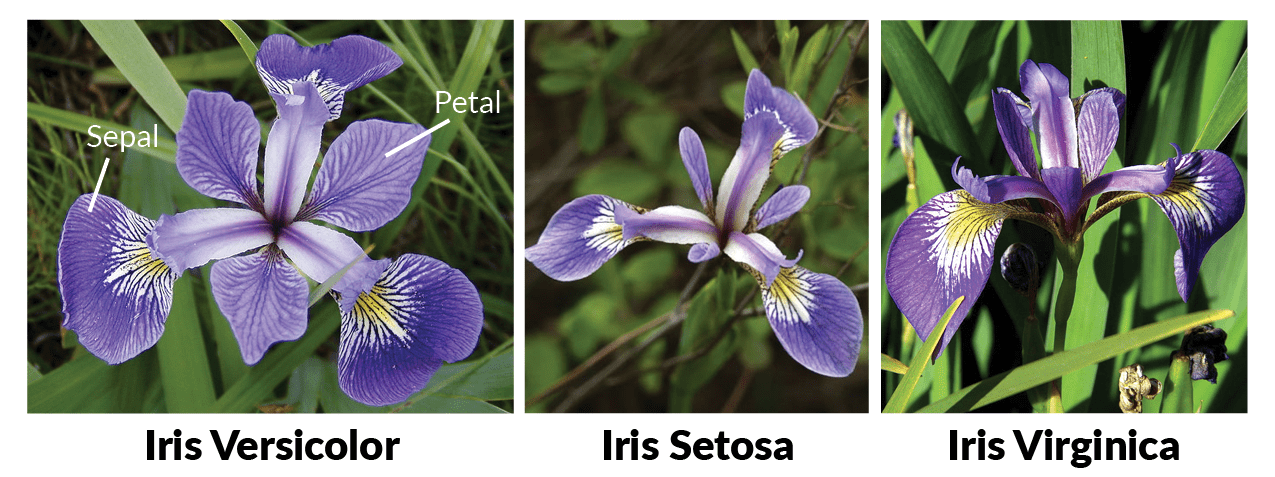
credits:from Machine Learning in R for beginners





In [4]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target']  )


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


so far the previous statments were not wrong..data is balanced, no null values

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
df.rename(columns={"sepal length (cm)": "sepal_length", "sepal width (cm)": "sepal_width",
                   "petal length (cm)": "petal_length","petal width (cm)":"petal_width"}, 
          errors="raise",inplace=True)

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
mapping ={0.0:'Iris-Setosa',1.0:'Iris-Versicolour',2.0:'Iris-Virginica'} #create mapping
list_mapped=[mapping[i] for i in df.target] #create list of speicies
df['specie']=list_mapped #add the new column (will be useful in visualization)

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,specie
0,5.1,3.5,1.4,0.2,0.0,Iris-Setosa
1,4.9,3.0,1.4,0.2,0.0,Iris-Setosa
2,4.7,3.2,1.3,0.2,0.0,Iris-Setosa
3,4.6,3.1,1.5,0.2,0.0,Iris-Setosa
4,5.0,3.6,1.4,0.2,0.0,Iris-Setosa


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


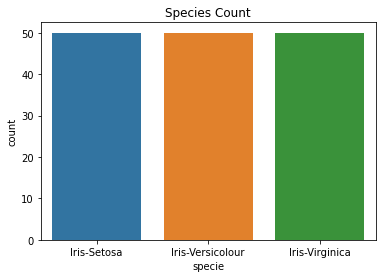

In [11]:
import seaborn as sns
plt.title('Species Count')
sns.countplot(df['specie']);

Iris-Setosa 0
Iris-Versicolour 1
Iris-Virginica 2

let's scatter plot each every 2 attributes together to try and find the pattern.

side note:
> Sepal: The outer parts of the flower (often green and leaf-like) that enclose a developing bud. Petal: The parts of a flower that are often conspicuously colored.




A pairs plot allows us to see both distribution of single variables and relationships between two variables.

1. sepal length, sepal width
2. sepal length, petal length
3. sepal length, petal width
4. sepal width, petal length
5. sepal width, petal width
6. petal length, petal width

We will look into 6 2D plots and try to understand the 4-dimensional data in the form of a matrix.



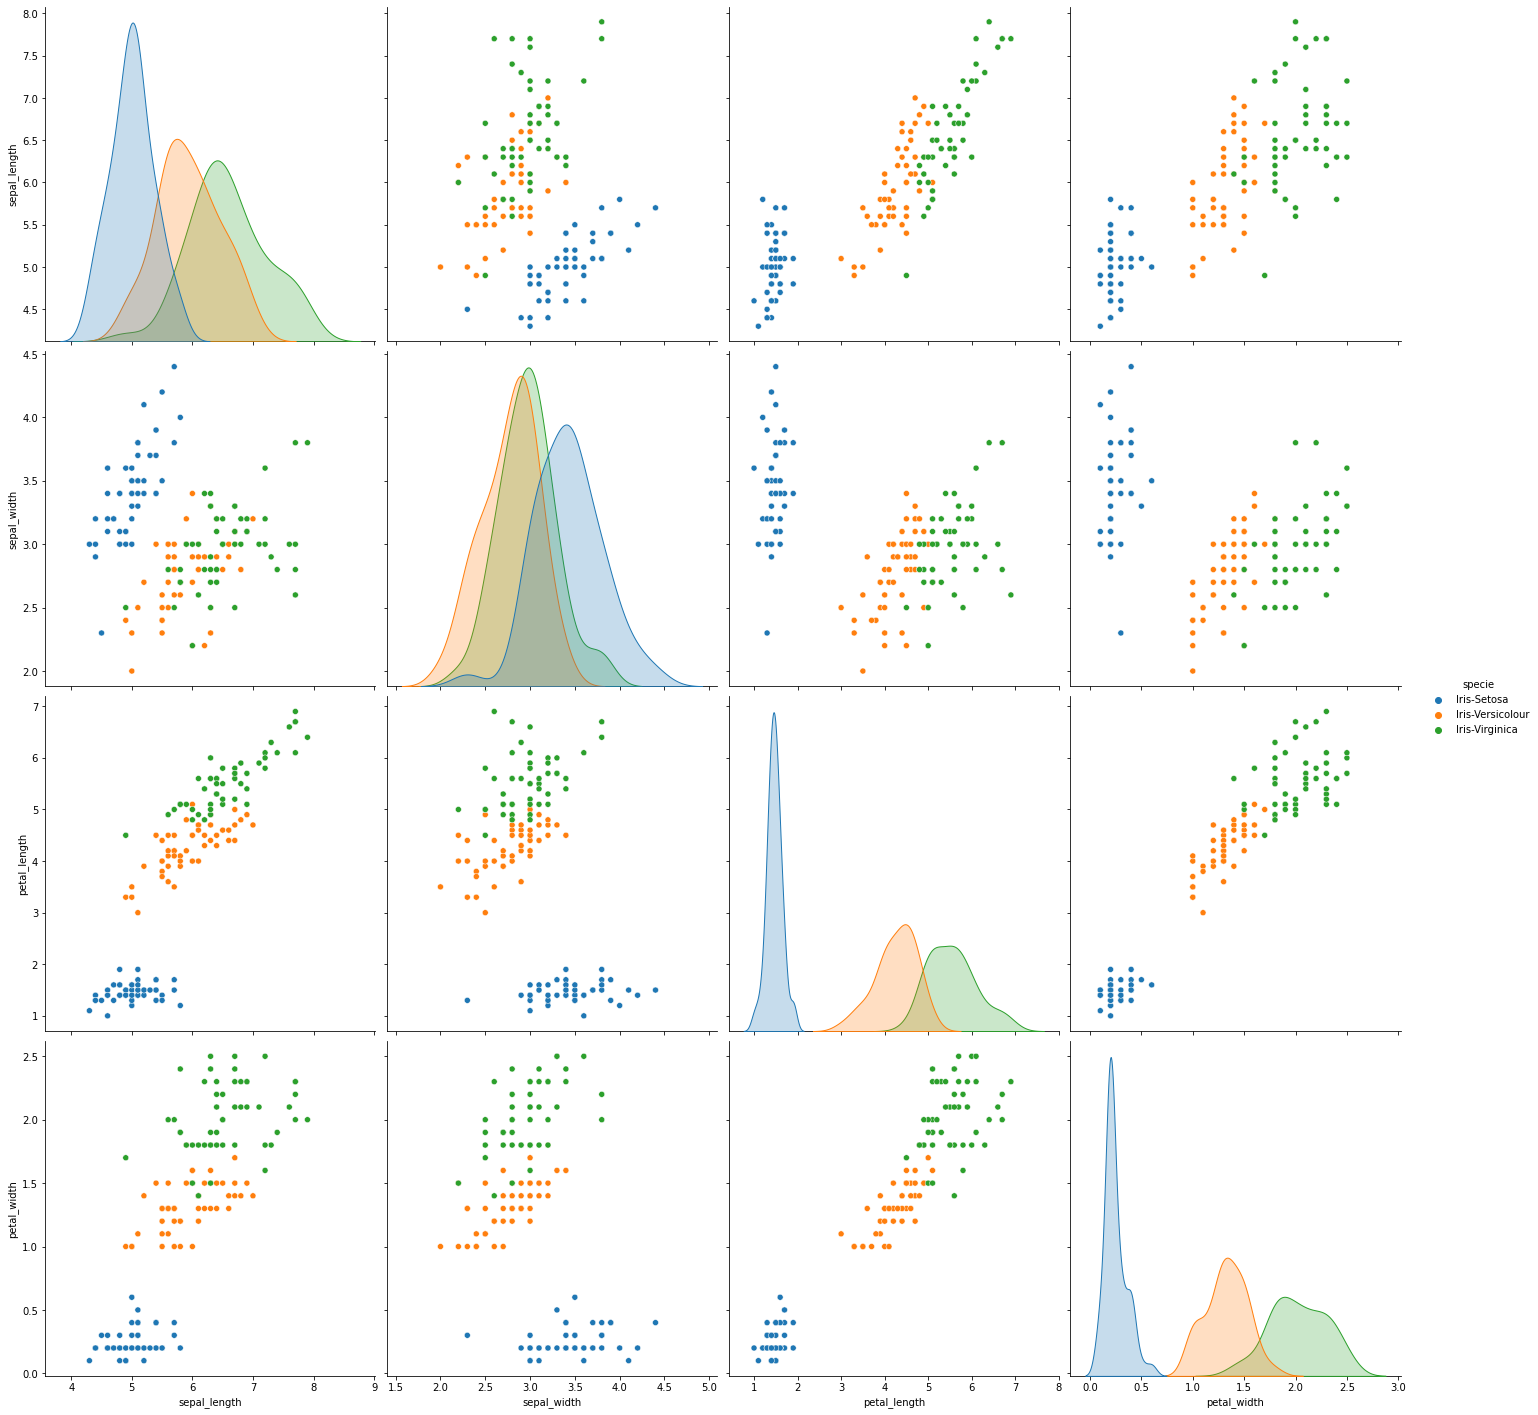

In [12]:
sns.pairplot(df.drop(['target'], axis=1),hue="specie",height=5); #it's good for observing the correlation 

Upper triangle and lower triangle which shows us the scatter plot.


note : The scatter plots show us the relationship between the features. These upper and lower triangles are the mirror image of each other.




Observations **overall**

1.   setosa
  *   has the smallest **sepal length**
  *   biggest **sepal width**
  *   smallest **petal length and width**
  
  note : different characteristics not all big or all small
2.   Versicolour
  * most of it's values stays in the middle between both classes

  note : more consistent unlike setosa

3.   Virginica 
  * highest **sepal length**
  * 2nd place to setosa in **sepal width**
  * highest **petal length and width**.





*   Setosa is (linearly separable) as shown above we can easily draw a line (using any simple classifer ) and make a very good classification,but virginica and Versicolor overlap in some areas which will give us some trouble.







3-d scatter plot to plot
1. sepal length, sepal width , petal width
2. sepal length, sepal width ,petal length

3. sepal length, petal width, petal length

In [13]:
import plotly.express as px
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='specie')
fig.show()


In [14]:
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_length',
              color='specie')
fig.show()


In [15]:
fig = px.scatter_3d(df, x='sepal_length', y='petal_width', z='petal_length',
              color='specie')
fig.show()


Let's Observe correlation and find which featuers features matters the most and what correlates with what


In [16]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


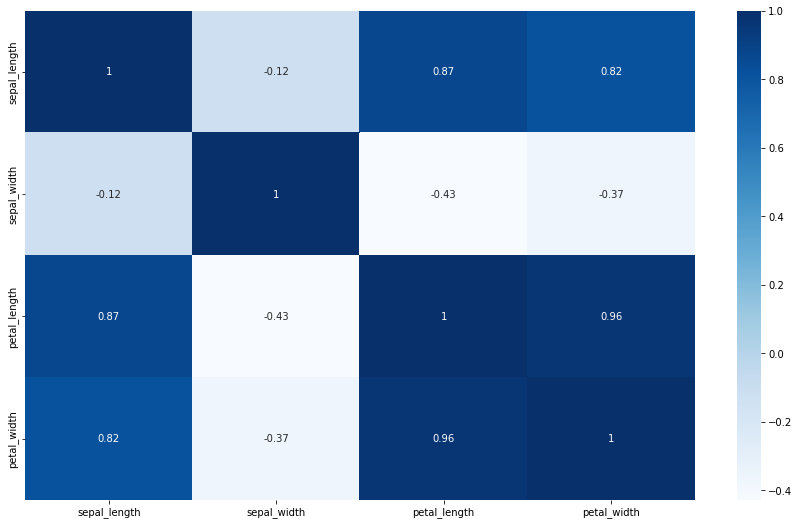

In [17]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(df.drop(['target'], axis=1).corr(), cmap='Blues', annot = True);


From the above heatmap, we see that 
* petal_length and petal_width have a high positive correlation (if one increases the other will likely do too)

* petal_width and sepal_length have good correlation as well as petal_length and sepal_length have good correlations.


# **Box plots**
is useful for indicating whether a distribution is skewed and whether there are potential unusual observations (outliers) in the data set.


![url[1]](https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-2.png)


![url[1]](https://miro.medium.com/v2/resize:fit:640/format:webp/1*JJSEEZ6cWNHJiYkb-y7lKg.png)

Definitions

**Median**
> The median (middle quartile) marks the mid-point of the data and is shown by the line that divides the box into two parts. Half the scores are greater than or equal to this value and half are less.




**Inter-quartile range**
>The middle “box” represents the middle 50% of scores for the group. The range of scores from lower to upper quartile is referred to as the inter-quartile range. The middle 50% of scores fall within the inter-quartile range.

**Upper quartile**
>%75 of the scores fall below the upper quartile.

**Lower quartile***
>%25 of scores fall below the lower quartile.

**Whiskers**
>The upper and lower whiskers represent scores outside the middle 50%. Whiskers often (but not always) stretch over a wider range of scores than the middle quartile groups.



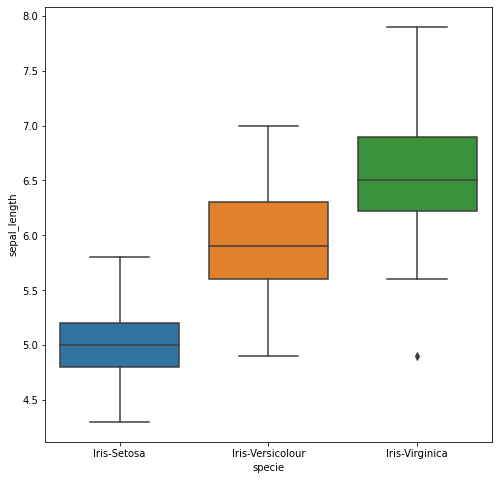

In [18]:
fig = plt.figure(figsize = (8,8))
sns.boxplot(x="specie",y="sepal_length", data=df)
plt.show()


we can easily find the median of each type of flower , outliers (if it exists after 1.5 times the range where 50% of the data exists be indicated by a **dot** and considered an outlier like in virginica)

the box itself shows the range where 50% of the data exists and the median is shown by a bold line inside the box

the end of the whiskers (T shaped) shows the min and max of the data



another observation is that **setosa** is more concentrated in a smaller range than the others  and virginica is more spread out wrt sepal length 


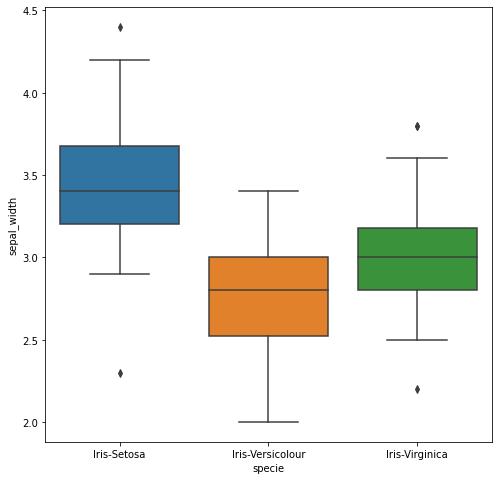

In [19]:
fig = plt.figure(figsize = (8,8))
sns.boxplot(x="specie",y="sepal_width", data=df)
plt.show()


many outliers exists wrt to sepal_width 

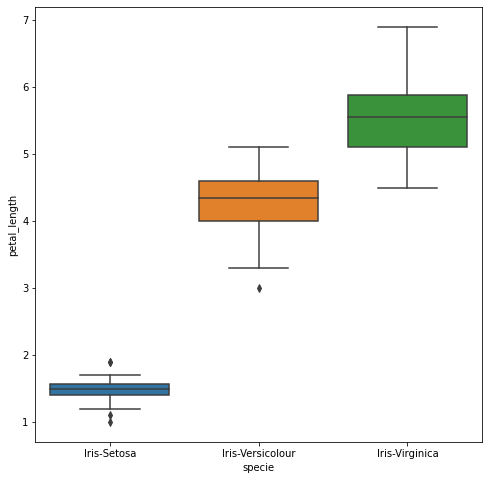

In [20]:
fig = plt.figure(figsize = (8,8))
sns.boxplot(x="specie",y="petal_length", data=df)
plt.show()


here as we can see setosa is more and more concentrated in smaller range and is easily separable than the other two...this was observed before

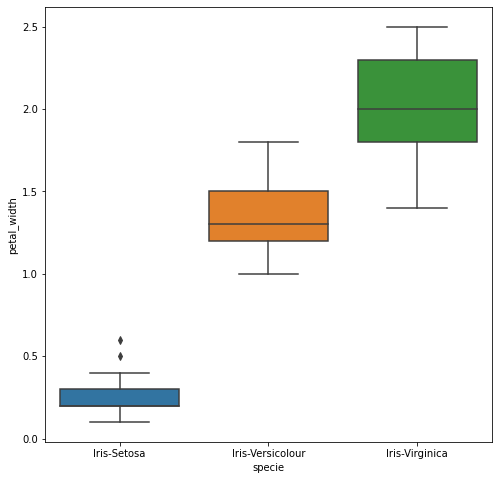

In [21]:
fig = plt.figure(figsize = (8,8))
sns.boxplot(x="specie",y="petal_width", data=df)
plt.show()


# **violin plot vs boxplot (extra)**

A violin plot is more informative than a plain box plot. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data (count). represents the density

![url](https://miro.medium.com/v2/resize:fit:640/format:webp/1*TTMOaNG1o4PgQd-e8LurMg.png)

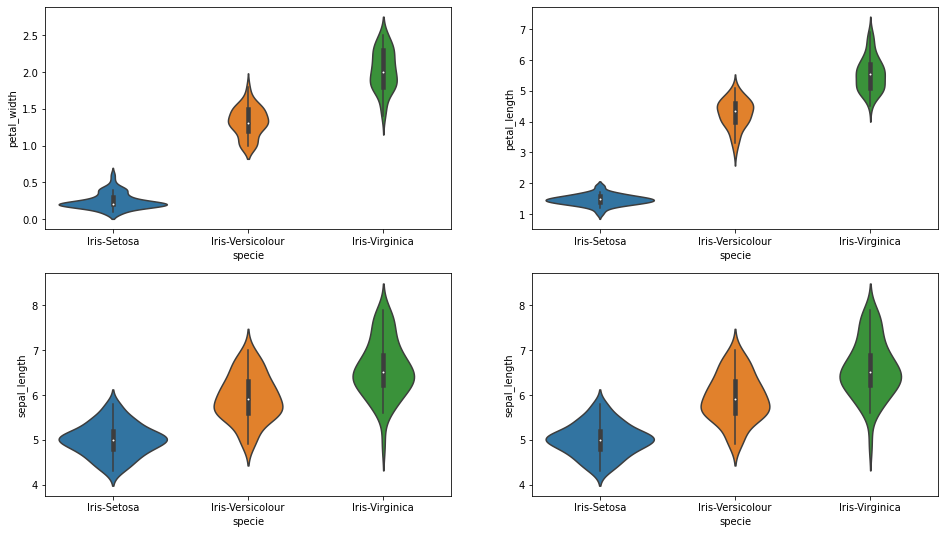

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(y="petal_width", x= "specie", data=df,  orient='v' , ax=axes[0, 0])
sns.violinplot(y="petal_length", x= "specie", data=df,  orient='v' , ax=axes[0, 1])
sns.violinplot(y="sepal_length", x= "specie", data=df,  orient='v' , ax=axes[1, 0])
sns.violinplot(y="sepal_length", x= "specie", data=df,  orient='v' , ax=axes[1, 1])
plt.show()


thanks to the violin plot we can clearly see the denisty of each class and a certian point

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def measurements_of_accuracy(Y_test,Y_pred,classifier):
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)
    matrix_precentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title("Confusion Matrix for "+classifier+"Classifier", fontsize=18)
    plt.grid(False)
    plt.show()
    
    plt.figure(figsize=(5,5))
    sns.set(font_scale=1.2)
    sns.heatmap(matrix_precentage, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title("Confusion Matrix for "+classifier+"Classifier")
    plt.grid(False)
    plt.show()

    
    #Accuracy
    print('Accuracy (percentage of predictions that are correct): %.4f' % accuracy_score(Y_test, Y_pred))

    print(classification_report(Y_test, Y_pred))


# **Classfication**
Using some of the commonly used classifiers

1.   K – Nearest Neighbour (KNN)
2.   Decision Trees
3.   Random Forest




***1.   K – Nearest Neighbour (KNN)***
as observed above, a classifier like KNN would do great on our data

In [32]:
from sklearn.model_selection import train_test_split
# Seperating the data into dependent and independent variables
X = df.iloc[:, :-2].values
y = df.target.values

# Splitting the dataset into the 80% Training set and 20% Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)


In [62]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

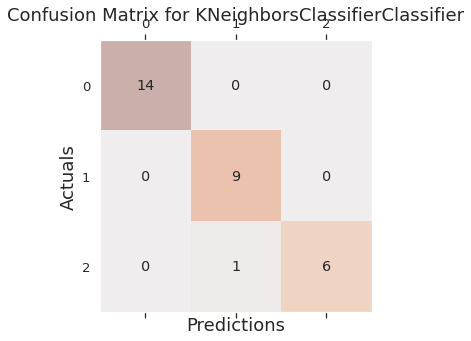

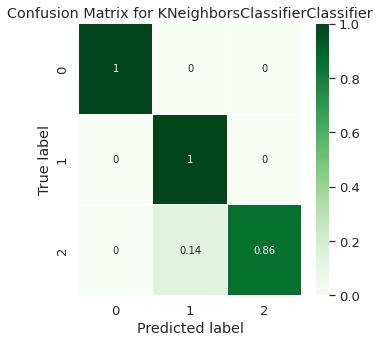

Accuracy (percentage of predictions that are correct): 0.9667
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       0.90      1.00      0.95         9
         2.0       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [63]:
measurements_of_accuracy(y_test,y_pred,"KNeighborsClassifier")

In [59]:
n_neighbors = range(1,50,1) # number of n_neighbors
random_grid = {'n_neighbors': n_neighbors,}
from sklearn.model_selection import GridSearchCV
knn_tuned = GridSearchCV(estimator = KNeighborsClassifier(),param_grid = random_grid,
              cv = 5,scoring='accuracy',return_train_score=True)



In [60]:
knn_tuned.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)}, return_train_score=True,
             scoring='accuracy')

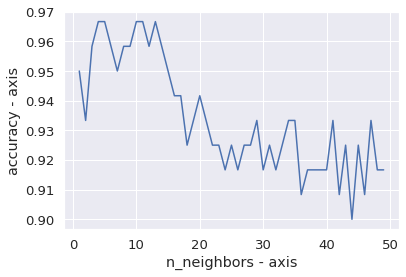

KNeighborsClassifier(n_neighbors=10)

In [61]:
plt.plot(list(n_neighbors), knn_tuned.cv_results_['mean_test_score'])
plt.xlabel('n_neighbors - axis')
plt.ylabel('accuracy - axis')
plt.show()
knn_tuned.best_estimator_

***2.   Decision Trees***

In [27]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


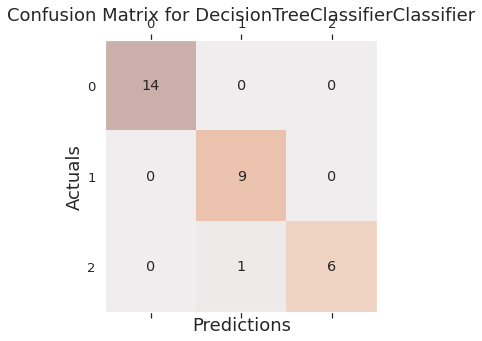

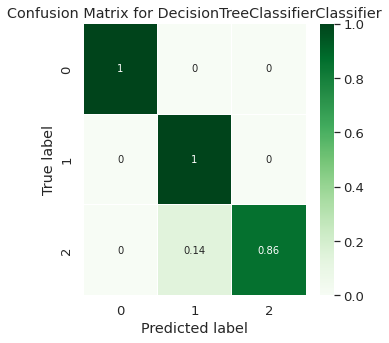

Accuracy (percentage of predictions that are correct): 0.9667
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       0.90      1.00      0.95         9
         2.0       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [28]:
measurements_of_accuracy(y_test,y_pred,"DecisionTreeClassifier")

***3. Random Forest***

In [29]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


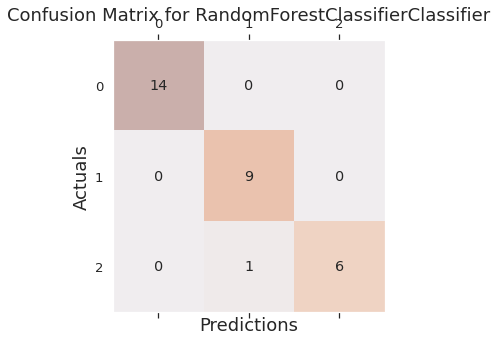

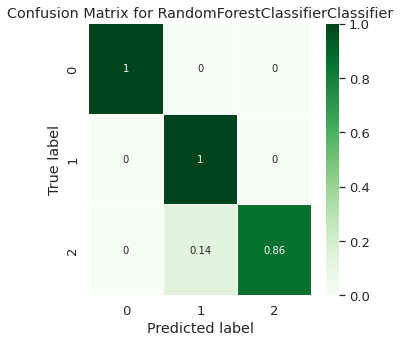

Accuracy (percentage of predictions that are correct): 0.9667
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       0.90      1.00      0.95         9
         2.0       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [30]:
measurements_of_accuracy(y_test,y_pred,"RandomForestClassifier")